# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 2. Read Dataset

In [3]:
df = pd.read_csv('datasets/cleaned_dataset.csv')
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,Result,HDays,ADays,HASL5M,HASTL5M,HACL5M,HAFL5M,HAYCL5M,HARCL5M,HAGSL5M,HAGCL5M,HAGSL5HM,HAGCL5HM,HGDL5M,HGDL5HM,HAPL5M,HAPL5HM,HWPL5M,HWPL5HM,HWinStreak,AASL5M,AASTL5M,AACL5M,AAFL5M,AAYCL5M,AARCL5M,AAGSL5M,AAGCL5M,AAGSL5AM,AAGCL5AM,AGDL5M,AGDL5AM,AAPL5M,AAPL5AM,AWPL5M,AWPL5AM,AWinStreak,HDef,HMid,HAtt,HOVR,ADef,AMid,AAtt,AOVR
0,2012-08-18,arsenal,sunderland,0,0,14,3,4,2,12,8,7,0,0,0,0,0,1.40,4.5,8.5,D,10,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,82,84,82.00,74,75,78,75.67
1,2012-09-01,swansea,sunderland,2,2,14,4,10,3,11,7,8,0,1,1,1,0,2.20,3.3,3.4,D,7,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,73,73,73,73.00,74,75,77,75.33
2,2012-09-22,west-ham,sunderland,1,1,20,4,11,2,12,10,10,1,2,1,0,0,2.10,3.3,3.6,D,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71,73,75,73.00,74,75,77,75.33
3,2012-10-06,city,sunderland,3,0,26,8,16,6,10,10,15,4,0,3,0,0,1.29,5.5,11.0,W,3,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,81,83,85,83.00,74,75,77,75.33
4,2012-10-27,stoke,sunderland,0,0,11,6,6,3,12,6,7,3,2,2,0,0,1.95,3.3,4.2,D,7,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,75,76,75,75.33,74,75,77,75.33


In [4]:
df.shape

(3800, 65)

In [5]:
df = df[[
         'HDays', 'ADays',
         'HASL5M', 'HASTL5M', 
         'HACL5M', 'HAFL5M', 'HAYCL5M', 'HARCL5M',
         'HAGSL5M', 'HAGCL5M', 'HAGSL5HM', 'HAGCL5HM',
         'HGDL5M', 'HGDL5HM', 'HAPL5M', 'HAPL5HM',
         'HWPL5M', 'HWPL5HM',
         'HWinStreak',
         'AASL5M', 'AASTL5M', 
         'AACL5M', 'AAFL5M', 'AAYCL5M', 'AARCL5M',
         'AAGSL5M', 'AAGCL5M', 'AAGSL5AM', 'AAGCL5AM',
         'AGDL5M', 'AGDL5AM', 'AAPL5M','AAPL5AM',
         'AWPL5M', 'AWPL5AM', 'AWinStreak', 
         'HDef', 'HMid', 'HAtt', 
         'HOVR',
         'ADef', 'AMid', 'AAtt', 
         'AOVR',
         'B365H', 'B365D', 'B365A',
         'Result'
        ]]
df.head()

,HDays,ADays,HASL5M,HASTL5M,HACL5M,HAFL5M,HAYCL5M,HARCL5M,HAGSL5M,HAGCL5M,HAGSL5HM,HAGCL5HM,HGDL5M,HGDL5HM,HAPL5M,HAPL5HM,HWPL5M,HWPL5HM,HWinStreak,AASL5M,AASTL5M,AACL5M,AAFL5M,AAYCL5M,AARCL5M,AAGSL5M,AAGCL5M,AAGSL5AM,AAGCL5AM,AGDL5M,AGDL5AM,AAPL5M,AAPL5AM,AWPL5M,AWPL5AM,AWinStreak,HDef,HMid,HAtt,HOVR,ADef,AMid,AAtt,AOVR,B365H,B365D,B365A,Result
0,10,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,82,84,82.00,74,75,78,75.67,1.40,4.5,8.5,D
1,7,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,73,73,73,73.00,74,75,77,75.33,2.20,3.3,3.4,D
2,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71,73,75,73.00,74,75,77,75.33,2.10,3.3,3.6,D
3,3,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,81,83,85,83.00,74,75,77,75.33,1.29,5.5,11.0,W
4,7,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,75,76,75,75.33,74,75,77,75.33,1.95,3.3,4.2,D


In [6]:
df.shape

(3800, 48)

In [7]:
df = df.dropna(axis=0).reset_index(drop=True)
df.head()

,HDays,ADays,HASL5M,HASTL5M,HACL5M,HAFL5M,HAYCL5M,HARCL5M,HAGSL5M,HAGCL5M,HAGSL5HM,HAGCL5HM,HGDL5M,HGDL5HM,HAPL5M,HAPL5HM,HWPL5M,HWPL5HM,HWinStreak,AASL5M,AASTL5M,AACL5M,AAFL5M,AAYCL5M,AARCL5M,AAGSL5M,AAGCL5M,AAGSL5AM,AAGCL5AM,AGDL5M,AGDL5AM,AAPL5M,AAPL5AM,AWPL5M,AWPL5AM,AWinStreak,HDef,HMid,HAtt,HOVR,ADef,AMid,AAtt,AOVR,B365H,B365D,B365A,Result
0,3,4,18.2,10.4,8.2,9.6,1.3,0.0,1.8,1.1,1.4,1.0,7.0,4.0,1.7,1.5,50.0,0.4,1.0,13.4,8.4,5.9,11.8,1.6,0.0,1.4,1.5,1.0,1.4,-1.0,-4.0,1.3,1.0,40.0,20.0,0.0,79,80,79,79.33,74,75,77,75.33,1.40,4.5,8.5,W
1,7,7,11.7,6.0,5.1,11.4,1.5,0.1,1.1,1.9,1.3,2.0,-8.0,-7.0,0.8,0.9,20.0,0.2,0.0,12.7,8.2,5.7,10.8,1.2,0.0,1.2,1.3,1.0,1.7,-1.0,-7.0,1.3,0.9,40.0,20.0,1.0,74,70,72,72.00,74,75,77,75.33,2.15,3.4,3.8,L
2,3,4,6.2,3.2,3.9,10.8,1.5,0.0,1.1,1.8,1.8,1.9,-7.0,-1.0,1.1,1.4,30.0,0.3,0.0,11.2,7.5,4.9,10.9,1.2,0.0,1.4,1.3,1.1,1.7,1.0,-6.0,1.6,1.1,50.0,30.0,0.0,70,70,73,71.00,74,75,77,75.33,2.50,3.4,3.0,W
3,10,10,12.4,6.8,6.0,11.0,1.5,0.1,1.2,1.4,1.3,1.2,-2.0,1.0,1.1,1.4,30.0,0.4,1.0,10.4,6.7,5.1,11.1,1.5,0.0,1.1,1.3,1.1,1.8,-2.0,-7.0,1.3,1.0,40.0,30.0,0.0,71,75,74,73.33,74,75,77,75.33,2.05,3.5,4.0,W
4,7,7,10.4,5.3,4.0,9.7,1.5,0.0,0.6,1.3,0.6,1.3,-7.0,-7.0,1.0,0.8,20.0,0.1,1.0,10.3,6.3,4.9,10.4,1.4,0.0,1.2,1.4,1.2,1.7,-2.0,-5.0,1.1,1.0,30.0,30.0,0.0,74,74,79,75.67,74,75,77,75.33,2.25,3.4,3.5,W


In [8]:
df.shape

(3324, 48)

# 2. Feature Selection

In [9]:
df = df[['HDays', 'ADays', 'HASL5M', 'HASTL5M', 'HACL5M', 'HAFL5M', 'HAYCL5M',
'HARCL5M', 'HAGSL5M', 'HAGCL5M', 'HGDL5M', 'HAPL5M', 'HWPL5M', 'HWinStreak',
'AASL5M', 'AASTL5M', 'AACL5M', 'AAFL5M', 'AAYCL5M', 
'AARCL5M', 'AAGSL5M', 'AAGCL5M', 'AGDL5M', 'AAPL5M', 'AWPL5M', 'AWinStreak', 
'HOVR', 'AOVR', 'B365H', 'B365D', 'B365A', 'Result']]

C:\Users\choibs\AppData\Local\Temp\ipykernel_6568\1829234885.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr('spearman'), annot=True)


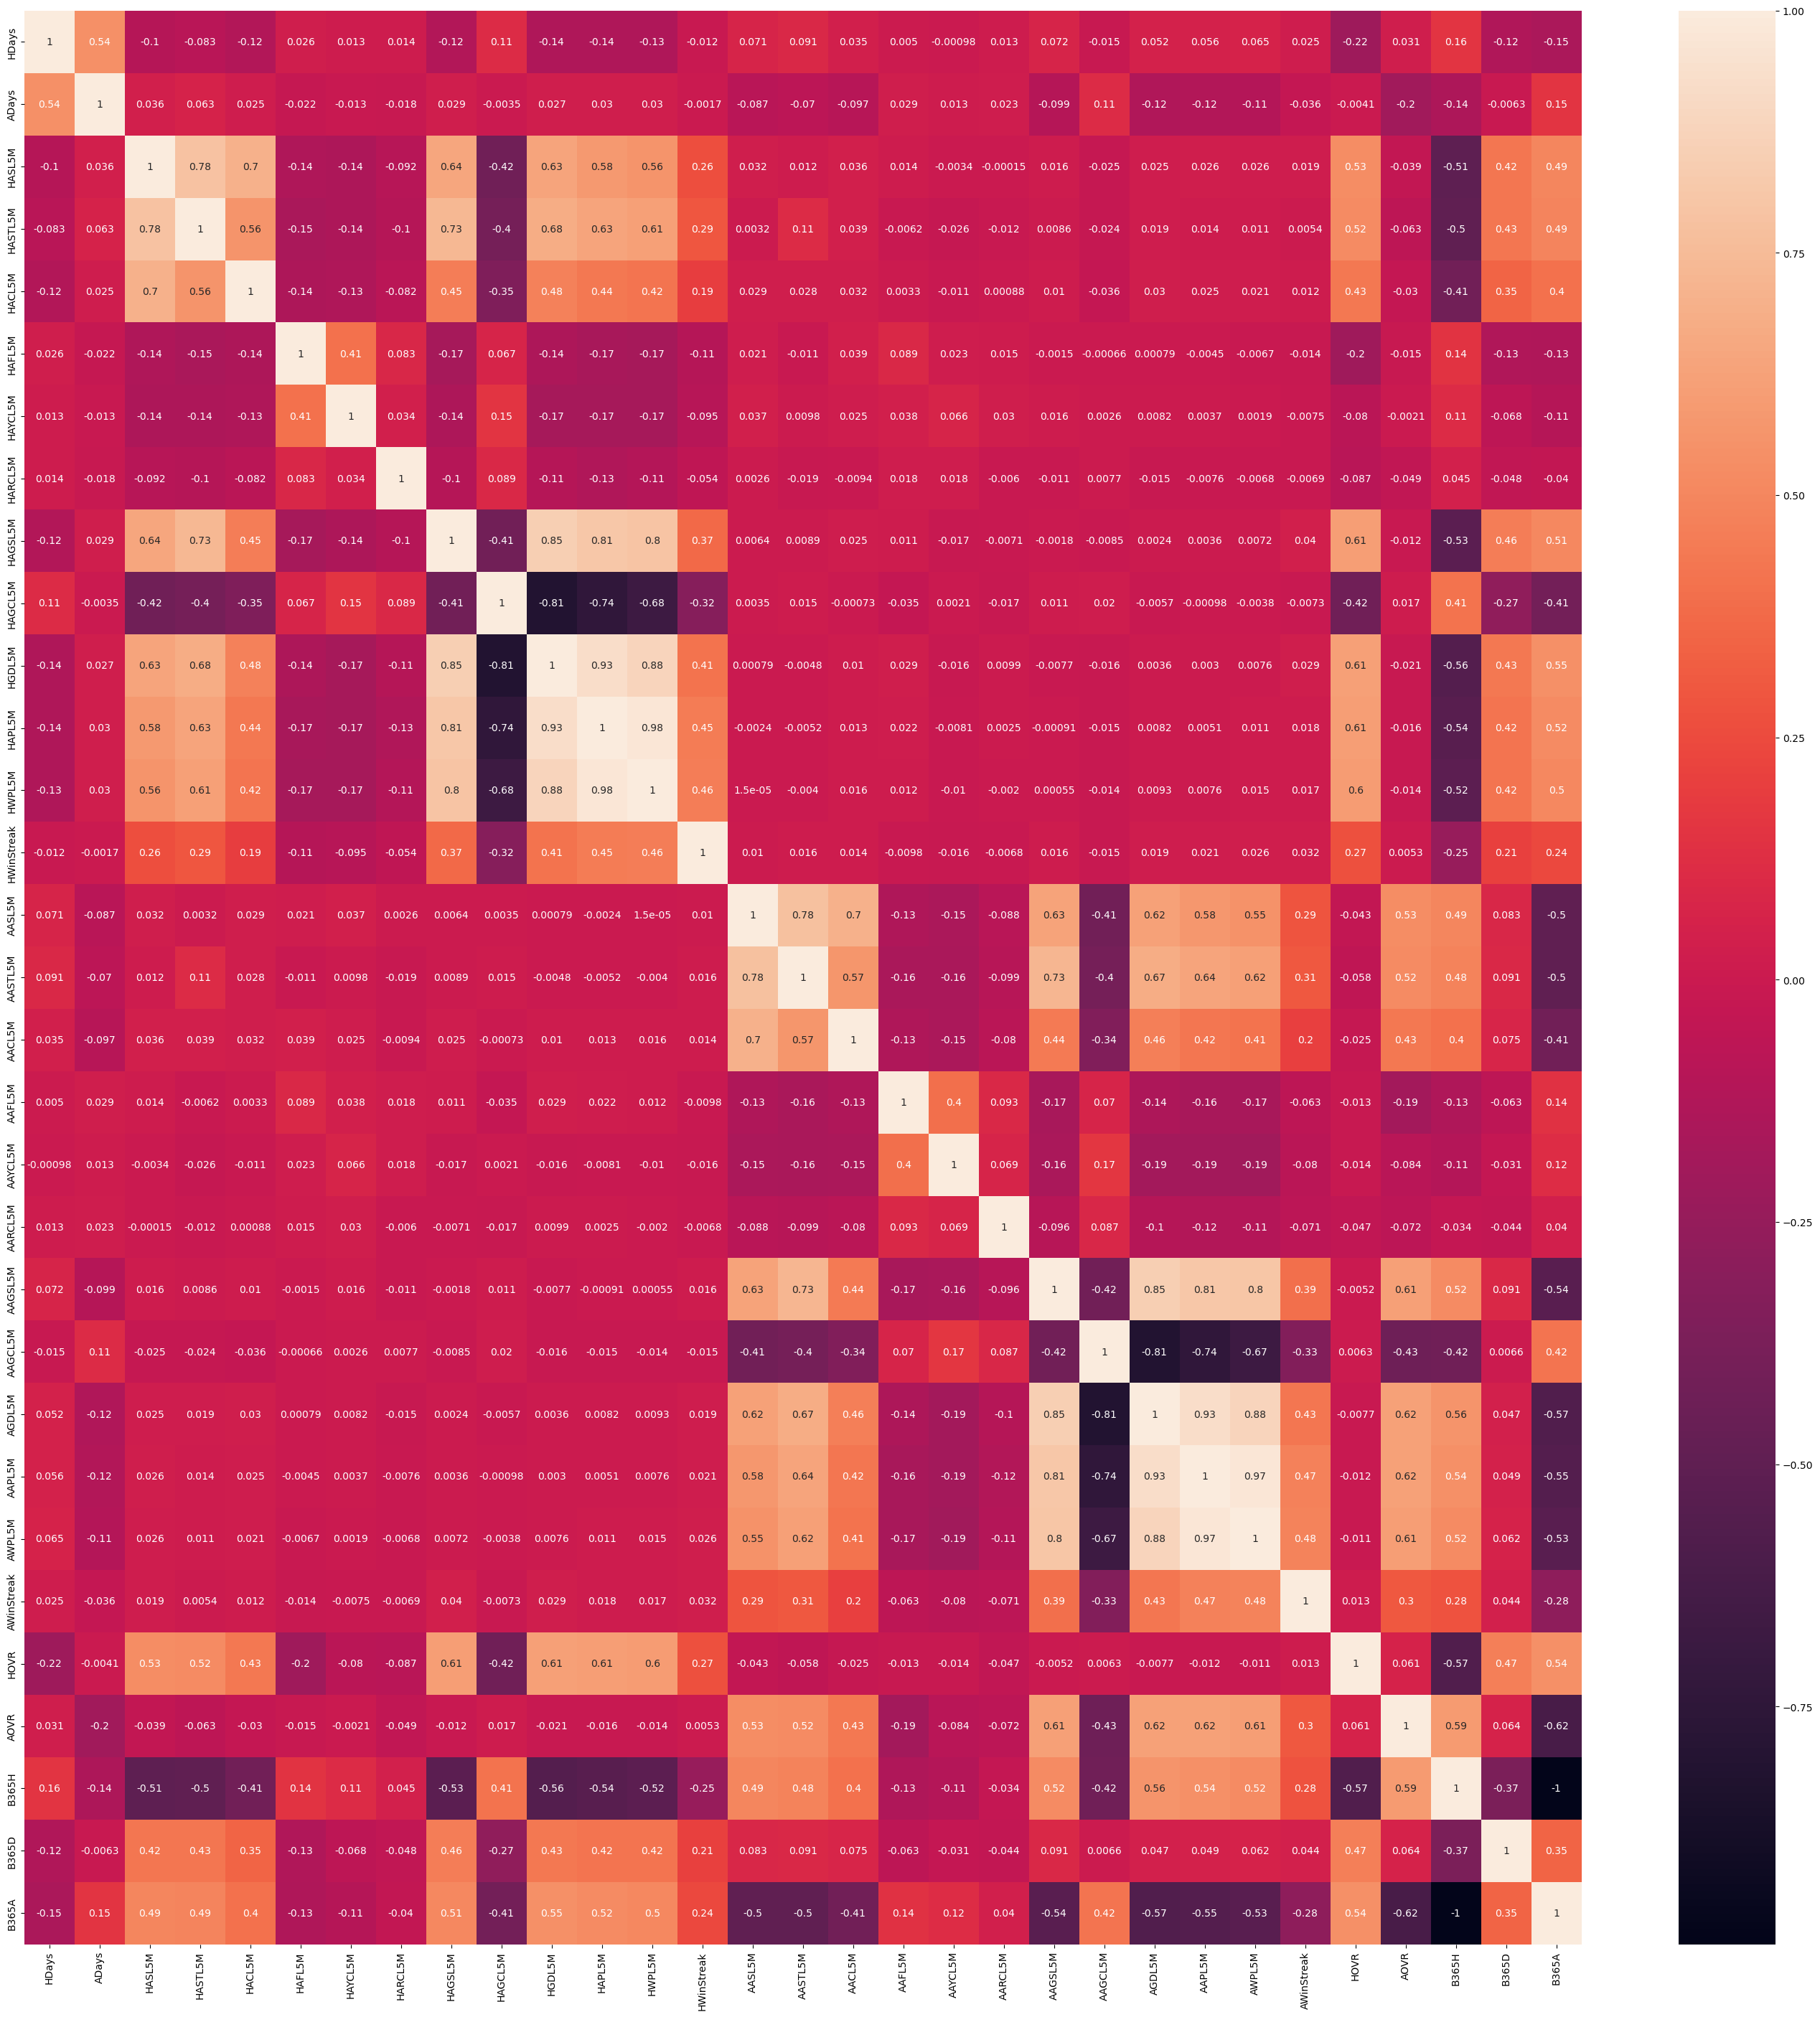

In [10]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(35,35))
sn.heatmap(df.corr('spearman'), annot=True)
plt.show()

In [11]:
# Take one of HASL5M, HASTL5M, HACL5M
# Take one of HAGSL5M, HGDL5M, HAPL5M, HWPL5M
# Take one of AASL5M, AASTL5M, AACL5M
# Take one of AAGSL5M, AGDL5M, AAPL5M, AWPL5M

under_7_df = df.drop(['HASTL5M', 'HACL5M',
                      'HAGSL5M', 'HGDL5M', 'HAPL5M',
                      'AASTL5M', 'AACL5M',
                      'AAGSL5M', 'AGDL5M', 'AAPL5M'
                      ], axis=1)

C:\Users\choibs\AppData\Local\Temp\ipykernel_6568\3487013666.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(under_7_df.corr('spearman'), annot=True)


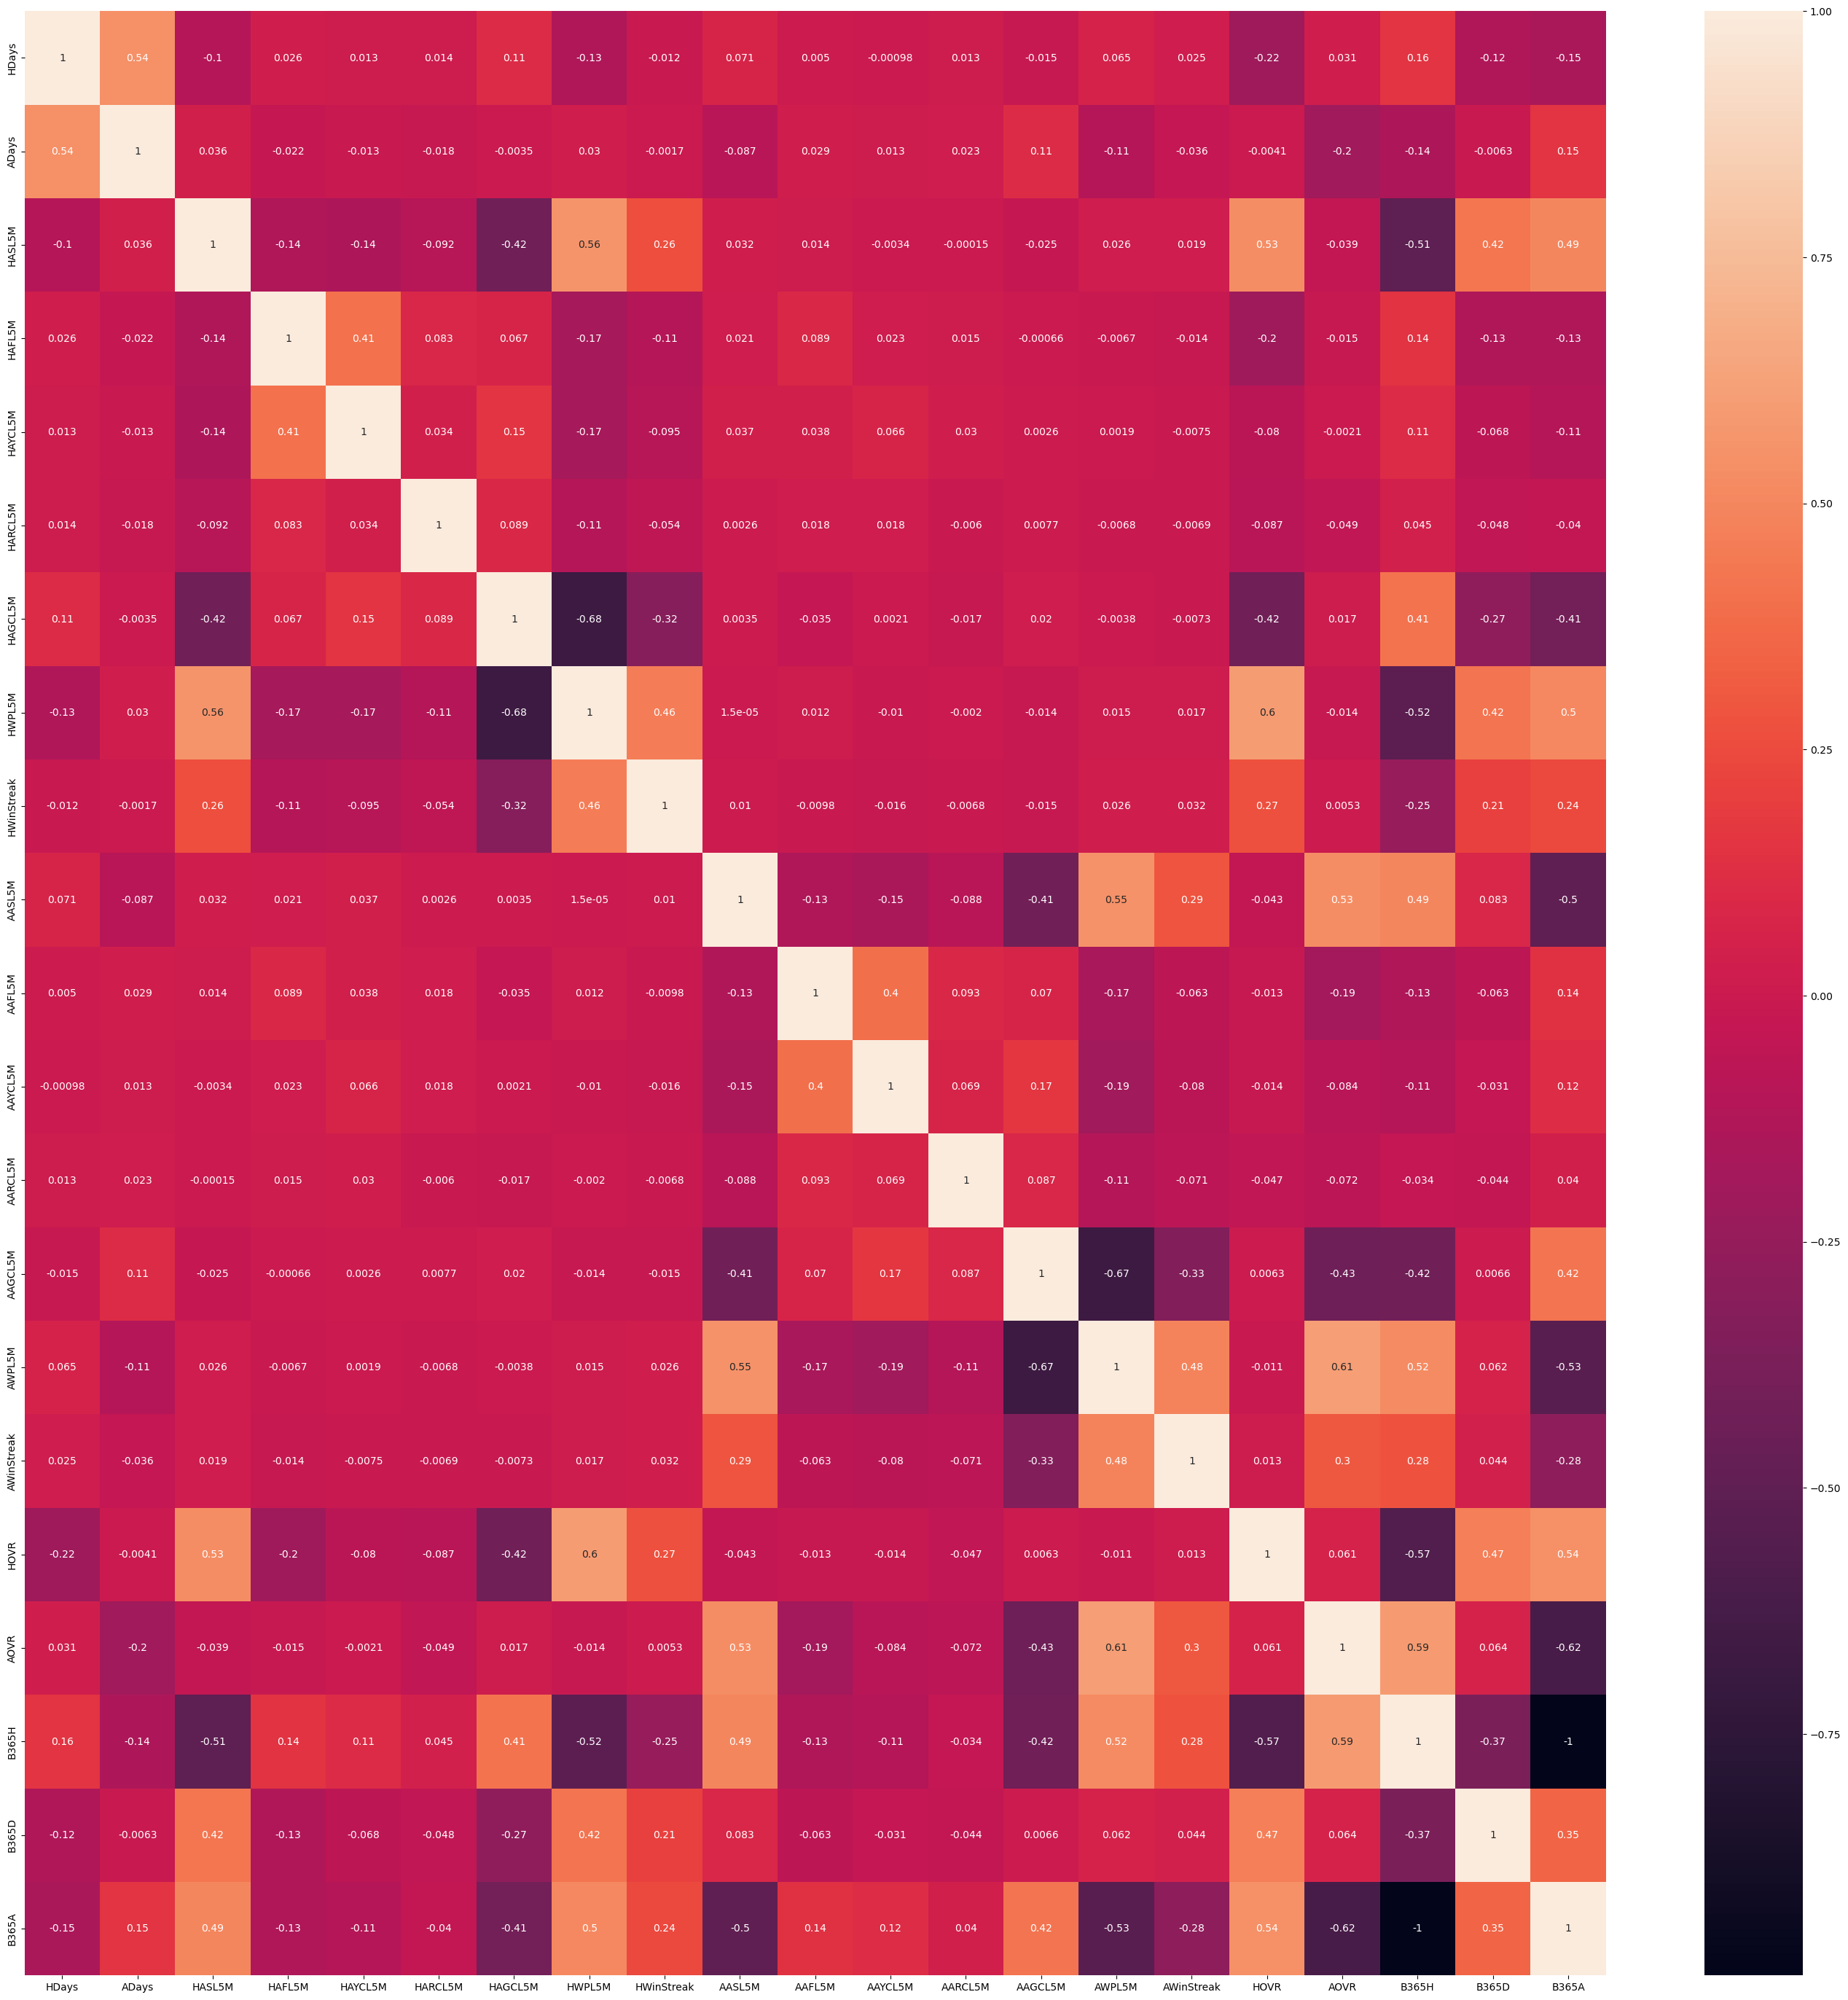

In [12]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(35,35))
sn.heatmap(under_7_df.corr('spearman'), annot=True)
plt.show()

In [13]:
under_7_df.columns

Index(['HDays', 'ADays', 'HASL5M', 'HAFL5M', 'HAYCL5M', 'HARCL5M', 'HAGCL5M',
       'HWPL5M', 'HWinStreak', 'AASL5M', 'AAFL5M', 'AAYCL5M', 'AARCL5M',
       'AAGCL5M', 'AWPL5M', 'AWinStreak', 'HOVR', 'AOVR', 'B365H', 'B365D',
       'B365A', 'Result'],
      dtype='object')

In [14]:
# from sklearn.preprocessing import MinMaxScaler
# from boruta import BorutaPy
# from sklearn.ensemble import RandomForestClassifier

# def ranking(ranks, names, order=1):
#     minmax = MinMaxScaler()
#     ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
#     ranks = map(lambda x: round(x,2), ranks)
#     return dict(zip(names, ranks))

# # y = df.Result
# # X = df.drop("Result", 1)

# y = under_7_df.Result
# X = under_7_df.drop('Result', 1)
# colnames = X.columns

# # using the BorutaPy function
# rf = RandomForestClassifier(n_jobs = -1, class_weight="balanced_subsample", max_depth=5)
# feat_selector = BorutaPy(rf, n_estimators="auto", random_state=1)
# feat_selector.fit(X.values, y.values.ravel())

# boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
# boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
# boruta_score = boruta_score.sort_values("Score", ascending = False)

In [15]:
# boruta_score

In [16]:
under_7_df = under_7_df.drop(['HDays', 'ADays', 'HARCL5M', 'AARCL5M'], axis=1)

In [17]:
# features = boruta_score[boruta_score['Score'] > 0.5].Features.tolist()

# 2. Prepare Train and Test Set

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

In [19]:
# Normal Dataset
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]

# BORUTA
# X = df[['B365A', 'B365H', 'B365D', 'HOVR', 'AOVR', 'HGDL5HM','AGDL5AM', 'AGDL5M', 'HGDL5M', 'HASL5M', 'AASL5M', 'AASTL5M', 'HASTL5M', 'HACL5M', 'AACL5M']]
# y = df['Result']

# >0.7 corr variables removed
X = under_7_df.iloc[:, :-1]
y = under_7_df.iloc[:, -1]

# >0.7 corr variables removed + BORUTA
# X = df[features]
# y = df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# standardization
sc = StandardScaler()

# X_train.iloc[:, 2:] = sc.fit_transform(X_train.iloc[:, 2:])
# X_test.iloc[:, 2:] = sc.transform(X_test.iloc[:, 2:])

X_train.iloc[:, :] = sc.fit_transform(X_train.iloc[:, :])
X_test.iloc[:, :] = sc.transform(X_test.iloc[:, :])

In [20]:
X_train.head()

,HASL5M,HAFL5M,HAYCL5M,HAGCL5M,HWPL5M,HWinStreak,AASL5M,AAFL5M,AAYCL5M,AAGCL5M,AWPL5M,AWinStreak,HOVR,AOVR,B365H,B365D,B365A
2499,-0.834181,-1.556414,-0.085807,-0.998441,0.075957,-0.457642,-1.528685,-1.780949,0.637077,-1.607510,0.545589,-0.508810,-0.724602,-0.701841,-0.422232,-0.608827,-0.149170
2992,-0.723489,-0.074773,-0.315575,-0.356344,0.075957,-0.457642,-0.198444,1.057000,1.550893,0.745511,-0.925234,-0.508810,0.354489,-0.433550,-0.100213,-0.745285,-0.510516
1387,-0.465207,-1.274197,-1.004879,0.713816,0.569773,0.809931,0.318872,-1.426205,-0.048286,0.317689,0.545589,0.699159,-0.635577,0.191566,0.129801,-0.529825,-0.636302
53,2.080714,-0.709762,-1.234647,1.141880,-0.417858,-0.457642,-0.974418,-1.071462,-0.505194,1.601155,-0.925234,-0.508810,0.354489,-0.522086,-0.679848,0.367924,0.804509
1758,0.198946,0.701324,-0.775111,0.713816,0.569773,-0.457642,-0.087590,1.198897,0.408623,-0.751866,0.545589,1.303144,0.535236,-0.613305,-0.500437,-0.314365,-0.201771


In [21]:
X_train.shape

(2659, 17)

In [22]:
y_train[0]

'W'

In [23]:
y_train.shape

(2659,)

### Data Imbalance

In [24]:
# from imblearn.over_sampling import SMOTE

print(y_train.value_counts())
print()

# # SMOTE
# smt = SMOTE(sampling_strategy="auto", random_state=0, k_neighbors=5)

# # Fit the smote model with training data only
# X_train, y_train = smt.fit_resample(X_train, y_train)

# print(y_train.value_counts())
# print()

W    1217
L     836
D     606
Name: Result, dtype: int64



### Dimensionality Reduction Techniques

In [181]:
# # LDA
# lda = LDA(n_components = 2)
# X_train = lda.fit_transform(X_train, y_train)
# X_test = lda.transform(X_test)

# # PCA
# pca = PCA(n_components = 2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [182]:
# X_train[0]

In [183]:
# X_test[0]

## 4. Model Evaluation

In [184]:
import pickle
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# load models
rf_classifier = pickle.load(open("models/rf_classifier.pkl", "rb"))
lr_classifier = pickle.load(open("models/lr_classifier.pkl", "rb"))
svc_classifier = pickle.load(open("models/svc_classifier.pkl", "rb"))
xgb_classifier = pickle.load(open("models/xgb_classifier.pkl", "rb"))
stack_classifier = pickle.load(open("models/stack_classifier.pkl", "rb"))

In [185]:
# get accuracies of each model
y_pred = rf_classifier.predict(X_test)
print('Accuracy on Test Set (Random Forest):', accuracy_score(y_test, y_pred))
print()

y_pred = lr_classifier.predict(X_test)
print('Accuracy on Test Set (Logistic Regression):', accuracy_score(y_test, y_pred))
print()

y_pred = svc_classifier.predict(X_test)
print('Accuracy on Test Set (Support Vector):', accuracy_score(y_test, y_pred))
print()

y_pred = stack_classifier.predict(X_test)
print('Accuracy on Test Set (Stack Classifier):', accuracy_score(y_test, y_pred))
print()

###
# for xgboost, have to encode test data
###
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

y_pred = xgb_classifier.predict(X_test)
print('Accuracy on Test Set (XGBoost):', accuracy_score(y_test, y_pred))
print()

Accuracy on Test Set (Random Forest): 0.544360902255639

Accuracy on Test Set (Logistic Regression): 0.5428571428571428

Accuracy on Test Set (Support Vector): 0.5338345864661654

Accuracy on Test Set (Stack Classifier): 0.5368421052631579

Accuracy on Test Set (XGBoost): 0.5503759398496241



## 3. Model Building

Accuracy on Test Set (Random Forest): 
- 0.544360902255639
- {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}

Accuracy on Test Set (Logistic Regression): 
- 0.5428571428571428
- {'C': 0.615848211066026, 'penalty': 'l1', 'solver': 'liblinear'}

Accuracy on Test Set (Support Vector): 
- 0.5338345864661654
- {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}

Accuracy on Test Set (XGBoost): 
- 0.5503759398496241
- {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 60}

Accuracy on Test Set (Stack Classifier): 
- 0.5203938115330521

## 3.1 Random Forest Classifier

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# random forest classifier 
# use GridSearchCV for hyperparameter tuning
classifier = RandomForestClassifier(random_state = 0)
param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [2, 3, 4, 5, 6],
    'criterion' :['entropy']    
}
# rf_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro')
rf_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
rf_classifier.fit(X_train, y_train)

# predict y_pred
y_pred = rf_classifier.predict(X_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


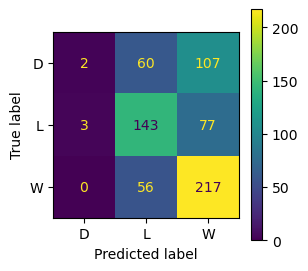

In [92]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))

# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=['D', 'L', 'W'])
cmp.plot(ax=ax)

plt.show()

In [93]:
# from sklearn.model_selection import cross_validate

# result = cross_validate(estimator = rf_classifier, X = X_train, y = y_train, scoring=('accuracy', 'f1_macro'), cv = 5)
# print(f"Accuracy on Train Set: {result['test_accuracy']}")
# print(f"f1-score on Train Set: {result['test_f1_macro']}")

In [94]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Calculate Accuracy
print('Accuracy on Test Set:', accuracy_score(y_test, y_pred))

# Calculate ROC_AUC
y_pred_probs = rf_classifier.predict_proba(X_test)
print('ROC score on Test Set:', roc_auc_score(y_test, y_pred_probs, multi_class="ovr", average="weighted"))

# Get Classification Report
print()
print(classification_report(y_test, y_pred))

Accuracy on Test Set: 0.544360902255639
ROC score on Test Set: 0.6913070994363529

              precision    recall  f1-score   support

           D       0.40      0.01      0.02       169
           L       0.55      0.64      0.59       223
           W       0.54      0.79      0.64       273

    accuracy                           0.54       665
   macro avg       0.50      0.48      0.42       665
weighted avg       0.51      0.54      0.47       665



### Save Model

In [95]:
# get the best parameters
print(rf_classifier.best_params_)

# save model
pickle.dump(rf_classifier, open("models/rf_classifier.pkl", "wb"))

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}


## 3.2 Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

classifier = LogisticRegression(random_state = 0)

param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']
}
# svc_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro') 
lr_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy') 
lr_classifier.fit(X_train, y_train)

# predict y_pred
y_pred = lr_classifier.predict(X_test)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


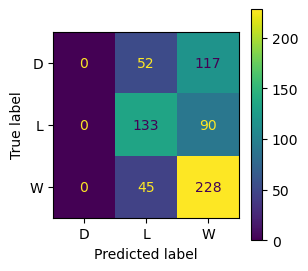

In [123]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))

# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=['D', 'L', 'W'])
cmp.plot(ax=ax)

plt.show();

In [124]:
# from sklearn.model_selection import cross_validate

# result = cross_validate(estimator = lr_classifier, X = X_train, y = y_train, scoring=('accuracy', 'f1_macro'), cv = 5)
# print(f"Accuracy on Train Set: {result['test_accuracy']}")
# print(f"f1-score on Train Set: {result['test_f1_macro']}")

In [125]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Calculate Accuracy
print('Accuracy on Test Set:', accuracy_score(y_test, y_pred))

# Calculate ROC_AUC
y_pred_probs = lr_classifier.predict_proba(X_test)
print('ROC score on Test Set:', roc_auc_score(y_test, y_pred_probs, multi_class="ovr", average="weighted"))

# Get Classification Report
print()
print(classification_report(y_test, y_pred))

Accuracy on Test Set: 0.5428571428571428
ROC score on Test Set: 0.6846874623653076

              precision    recall  f1-score   support

           D       0.00      0.00      0.00       169
           L       0.58      0.60      0.59       223
           W       0.52      0.84      0.64       273

    accuracy                           0.54       665
   macro avg       0.37      0.48      0.41       665
weighted avg       0.41      0.54      0.46       665



C:\Users\choibs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\choibs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\choibs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Save Model

In [126]:
# get the best parameters
print(lr_classifier.best_params_)

# save model
pickle.dump(lr_classifier, open("models/lr_classifier.pkl", "wb"))

{'C': 0.615848211066026, 'penalty': 'l1', 'solver': 'liblinear'}


## 3.3 SVM Classifier

In [100]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Support Vector Classifier
# use GridSearchCV for hyperparameter tuning
classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
param_grid = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'sigmoid']
}
# svc_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro') 
svc_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy') 
svc_classifier.fit(X_train, y_train)

# predict y_pred
y_pred = svc_classifier.predict(X_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


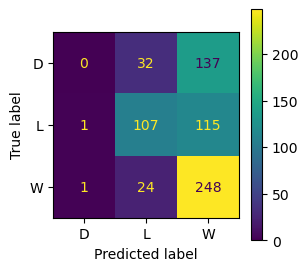

In [101]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))

# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=['D', 'L', 'W'])
cmp.plot(ax=ax)

plt.show();

In [102]:
# from sklearn.model_selection import cross_validate

# result = cross_validate(estimator = svc_classifier, X = X_train, y = y_train, scoring=('accuracy', 'f1_macro'), cv = 5)
# print(f"Accuracy on Train Set: {result['test_accuracy']}")
# print(f"f1-score on Train Set: {result['test_f1_macro']}")

In [103]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Calculate Accuracy
print('Accuracy on Test Set:', accuracy_score(y_test, y_pred))

# Calculate ROC_AUC
y_pred_probs = svc_classifier.predict_proba(X_test)
print('ROC score on Test Set:', roc_auc_score(y_test, y_pred_probs, multi_class="ovr", average="weighted"))

# Get Classification Report
print()
print(classification_report(y_test, y_pred))

Accuracy on Test Set: 0.5338345864661654
ROC score on Test Set: 0.6667892501689944

              precision    recall  f1-score   support

           D       0.00      0.00      0.00       169
           L       0.66      0.48      0.55       223
           W       0.50      0.91      0.64       273

    accuracy                           0.53       665
   macro avg       0.38      0.46      0.40       665
weighted avg       0.42      0.53      0.45       665



### Save Model

In [109]:
# get the best parameters
print(svc_classifier.best_params_)

# save model
pickle.dump(svc_classifier, open("models/svc_classifier.pkl", "wb"))

{'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}


## 3.4 XGBoost Classifier

Highest Accuracy: 51.8 %

In [104]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# for xgboost, have to encode test data
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

# XGB Classifier
# use GridSearchCV for hyperparameter tuning
classifier = XGBClassifier()
param_grid = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
# knn_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='f1_macro')
xgb_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
xgb_classifier.fit(X_train, y_train)

# predict
y_pred = xgb_classifier.predict(X_test)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


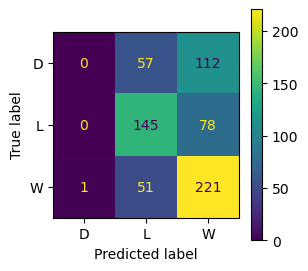

In [105]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))

# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=['D', 'L', 'W'])
cmp.plot(ax=ax)

plt.show();

In [106]:
# from sklearn.model_selection import cross_validate

# result = cross_validate(estimator = xgb_classifier, X = X_train, y = y_train, scoring=('accuracy', 'f1_macro'), cv = 5)
# print(f"Accuracy on Train Set: {result['test_accuracy']}")
# print(f"f1-score on Train Set: {result['test_f1_macro']}")

In [107]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Calculate Accuracy
print('Accuracy on Test Set:', accuracy_score(y_test, y_pred))

# Calculate ROC_AUC
y_pred_probs = xgb_classifier.predict_proba(X_test)
print('ROC score on Test Set:', roc_auc_score(y_test, y_pred_probs, multi_class="ovr", average="weighted"))

# Get Classification Report
print()
print(classification_report(y_test, y_pred))

Accuracy on Test Set: 0.5503759398496241
ROC score on Test Set: 0.6971672048639974

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       169
           1       0.57      0.65      0.61       223
           2       0.54      0.81      0.65       273

    accuracy                           0.55       665
   macro avg       0.37      0.49      0.42       665
weighted avg       0.41      0.55      0.47       665



### Save Model

In [108]:
# get the best parameters
print(xgb_classifier.best_params_)

# save model
pickle.dump(xgb_classifier, open("models/xgb_classifier.pkl", "wb"))

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 60}
